# The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.
https://www.kaggle.com/datasets/msambare/fer2013?resource=download

# 2. Initial EDA

### Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from skimage import io
import random

In [2]:
!pwd

/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/facial-expression-recognition/notebooks/ivan


In [3]:
# '/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/test'
train_path = '../../../project_data/train/' # added the last forward slash
test_path = '../../../project_data/test/' # added the last forward slash

# create a dictionary with each emotion encoded as integer
emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
# create a dictionary with values as keys to lookup original labels
label_lookup  = {y: x for x, y in emotions.items()} 

#### Exploring the folder contents

In [4]:
# dir_paths = [] # paths to files
# dir_names = [] # flattened images
# files = [] # integers as labels 
# for dir_path, dir_name, file_names in os.walk(train_path, topdown=False):
#     dir_paths.append(dir_path)
#     dir_names.append(dir_name)
#     for filename in file_names:
#         files.append(filename)

In [5]:
# dir_paths

In [6]:
# dir_names

In [7]:
# files[:3]

### Loading the data

In [45]:
def preprocess(path_to_folder):
    
    '''
    Takes path to a directory with images (train or test) as input
    Returns three lists:
    1. Full paths to image files
    2. Images as flattened arrays
    3. String labels for each image
    '''
    
    files = [] # paths to files
    images = [] # flattened images
    labels = [] # integers as labels 

    for dir_path, dir_name, file_names in os.walk(path_to_folder, topdown=False):
        label = dir_path.replace(path_to_folder,'') # taking a label out of path
        if label != '':
            for filename in file_names:
                file_path = os.path.join(dir_path, filename) # creaitng a full path for file
                img = io.imread(file_path) # reading the image from the path
#                 img_array = np.array(img).flatten() # creating an array and flattening
                img_array = np.array(img)#.flatten() # creating an array and flattening
                img_array = img_array / 255.0 # Scale pixel values to a range of 0 to 1

                files.append(file_path) # append file path
                images.append(img_array) # append flattened array
#                 labels.append(label) # append label as a string
                labels.append(emotions[label]) # append label as an integer
    
    # print out lengths of each list before returning the results
    print(f'Number of files: {len(files)}')
    print(f'Number of images: {len(images)}')
    print(f'Number of labels: {len(labels)}')
    return files, images, labels

In [22]:
def preprocess_arrays(path_to_folder):
    
    '''
    Takes path to a directory with images (train or test) as input
    Returns the following items:
    1. List with paths to image files
    2. Images as numpy arrays (scaled between 0 and 1)
    3. String labels for each image encoded as integers
    '''
    
    files = [] # paths to files
    images = [] # flattened images
    labels = [] # integers as labels 

    for dir_path, dir_name, file_names in os.walk(path_to_folder, topdown=False):
        label = dir_path.replace(path_to_folder,'') # taking a label out of path
        if label != '':
            for filename in file_names:
                file_path = os.path.join(dir_path, filename) # creaitng a full path for file
                img = io.imread(file_path) # reading the image from the path
                img_array = np.array(img)#.flatten() # creating an array and flattening
                img_array = img_array / 255.0 # Scale pixel values to a range of 0 to 1 

                files.append(file_path) # append file path
                images.append(img_array) # append an array to the list
                #labels.append(label) # append label as a string
                labels.append(emotions[label]) # append label encoded as an integer

    # saving as numpy arrays
    images = np.asarray(images) 
    labels = np.asarray(labels)
    
    # print out lengths of each list before returning the results
    print(f'Number of files: {len(files)}, data type: {type(files)}')
    print(f'Number of images: {len(images)}, data type: {type(images)}, shape: {images.shape}')
    print(f'Number of labels: {len(labels)}, data type: {type(labels)}, shape: {labels.shape}')
    return files, images, labels

In [46]:
# Creating the lists for files arrays and labels of train data
train_files, train_images, train_labels = preprocess(train_path)

Number of files: 28709
Number of images: 28709
Number of labels: 28709


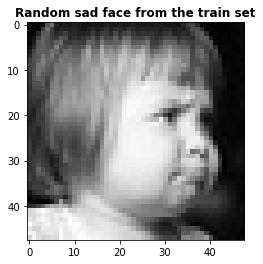

In [47]:
# Sanity check using a random image from the train set
f = random.randint(1,len(train_files))
img = io.imread(train_files[f])

plt.imshow(img, cmap='gray')
plt.title(f'Random {label_lookup[train_labels[f]]} face from the train set', fontweight = 'bold')
plt.show()

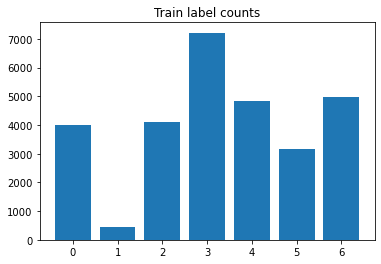

In [48]:
#Count the number of occurences in the train set
label, counts = np.unique(train_labels, return_counts = True)

plt.bar(label, counts )
plt.title('Train label counts')
plt.show()

In [49]:
# Creating the lists for files arrays and labels of train data
test_files, test_images, test_labels = preprocess(test_path)

Number of files: 7178
Number of images: 7178
Number of labels: 7178


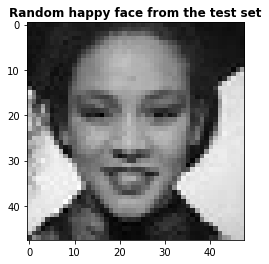

In [50]:
# Sanity check using a random image from the test set
f = random.randint(1,len(test_files))
img = io.imread(test_files[f])

plt.imshow(img, cmap='gray')
plt.title(f'Random {label_lookup[train_labels[f]]} face from the test set', fontweight = 'bold')
plt.show()

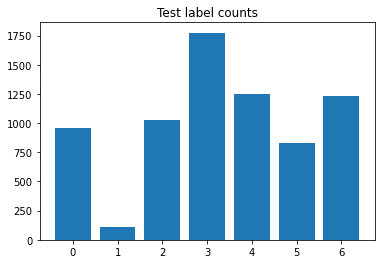

In [51]:
#Count the number of occurences in the test set
label, counts = np.unique(test_labels, return_counts = True)

plt.bar(label, counts )
plt.title('Test label counts')
plt.show()

## TensorFlow

In [52]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [53]:
print(tf.__version__)

2.8.0


In [54]:
# checking image size
f = random.randint(1,len(test_files))
img = io.imread(test_files[f])
print(img.shape)
img_size = img.shape[0]
img_size

(48, 48)


48

### Generate batches of tensor image data with real-time data augmentation

In [55]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(
                                # rotation_range = 180,
                                 width_shift_range = 0.1, 
                                 height_shift_range = 0.1, 
                                 horizontal_flip = True,# Boolean. Randomly flip inputs horizontally.
                                 rescale = 1./255, # rescaling factor.
                                 zoom_range = 0.1, # Range for random zoom
                                 validation_split = 0.3 # Fraction of images reserved for validation
                                )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.3)

In [56]:
"""
Apply above transformations to the train/test images
"""
train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_path,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 20099 images belonging to 7 classes.
Found 2151 images belonging to 7 classes.


### Creating a Model

In [57]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [58]:
epochs = 100
batch_size = 64

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [60]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100


2022-05-04 11:30:13.902474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


315/315 [==============================] - ETA: 0s - loss: 9.2569 - accuracy: 0.2071

2022-05-04 11:30:55.431937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


315/315 [==============================] - 43s 135ms/step - loss: 9.2569 - accuracy: 0.2071 - val_loss: 8.5571 - val_accuracy: 0.2473
Epoch 2/100
315/315 [==============================] - 42s 135ms/step - loss: 8.3309 - accuracy: 0.2421 - val_loss: 7.9479 - val_accuracy: 0.2171
Epoch 3/100
315/315 [==============================] - 45s 142ms/step - loss: 7.5949 - accuracy: 0.2581 - val_loss: 7.1586 - val_accuracy: 0.2734
Epoch 4/100
315/315 [==============================] - 48s 151ms/step - loss: 6.8649 - accuracy: 0.2747 - val_loss: 6.4783 - val_accuracy: 0.2887
Epoch 5/100
315/315 [==============================] - 54s 170ms/step - loss: 6.1885 - accuracy: 0.2922 - val_loss: 5.7810 - val_accuracy: 0.3264
Epoch 6/100
315/315 [==============================] - 59s 189ms/step - loss: 5.5132 - accuracy: 0.3169 - val_loss: 5.2799 - val_accuracy: 0.2808
Epoch 7/100
315/315 [==============================] - 64s 202ms/step - loss: 4.9739 - accuracy: 0.3332 - val_loss: 4.6622 - val_accurac

Epoch 57/100
315/315 [==============================] - 41s 129ms/step - loss: 1.4312 - accuracy: 0.6408 - val_loss: 1.4600 - val_accuracy: 0.6420
Epoch 58/100
315/315 [==============================] - 41s 131ms/step - loss: 1.4024 - accuracy: 0.6469 - val_loss: 1.4275 - val_accuracy: 0.6499
Epoch 59/100
315/315 [==============================] - 41s 129ms/step - loss: 1.3799 - accuracy: 0.6524 - val_loss: 1.4599 - val_accuracy: 0.6318
Epoch 60/100
315/315 [==============================] - 41s 129ms/step - loss: 1.3634 - accuracy: 0.6569 - val_loss: 1.4190 - val_accuracy: 0.6490
Epoch 61/100
315/315 [==============================] - 40s 128ms/step - loss: 1.3448 - accuracy: 0.6579 - val_loss: 1.4723 - val_accuracy: 0.6244
Epoch 62/100
315/315 [==============================] - 41s 129ms/step - loss: 1.3642 - accuracy: 0.6504 - val_loss: 1.4486 - val_accuracy: 0.6374
Epoch 63/100
315/315 [==============================] - 41s 130ms/step - loss: 1.3675 - accuracy: 0.6503 - val_loss: 1

#### Plotting Accuracy Scores

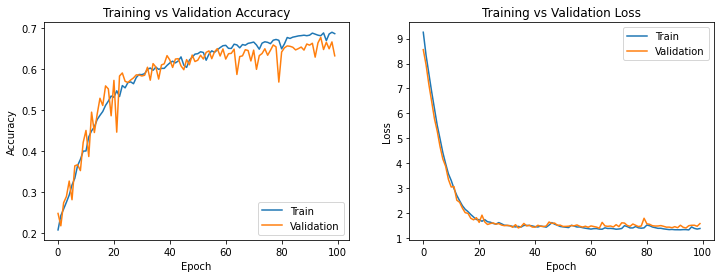

In [61]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [63]:

print(history.params)

# check the keys of history object
print(history.history.keys())



{'verbose': 1, 'epochs': 100, 'steps': 315}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
